### Initial exploration of MAJIQ splicing events afeter processing 

In [12]:
import sqlite3
import pandas as pd

# Data loading
db = "/home/bia/LandscapeSplicingGrasses/SplicingLandscapeGrasses/merging_outputs/test.db"
conn = sqlite3.connect(db)

'''cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables'''

query_events = "SELECT * FROM splicing_events"
df_events = pd.read_sql(query_events, conn)

# print("Lines:", df_events.shape[0])
df_events.head(3)



,id,event_id,search,gene_name,gene_id,seqid,strand,event_type,start,end,coord,full_coord,upstream_exon_coord,downstream_exon_coord,mean_psi_majiq,mean_psi_sgseq
0,1,"AT3G29160_Chr3:11130727,11130909-11131004,1113...","AT3G29160_Chr3:11130727,11130909-11131004,1113...",AT3G29160,AT3G29160.Araport11.447,Chr3,-,A5SS,11130909,11131004,Chr3:11130909-11131004,"Chr3:11130727,11130909-11131004,11131188",11130727-11130909,11131004-11131188,0.9116,0.0
1,2,"AT3G29160_Chr3:11130727,11130909-11131127,1113...","AT3G29160_Chr3:11130727,11130909-11131127,1113...",AT3G29160,AT3G29160.Araport11.447,Chr3,-,A5SS,11130909,11131127,Chr3:11130909-11131127,"Chr3:11130727,11130909-11131127,11131188",11130727-11130909,11131004-11131188,0.08844,0.0
2,3,"AT1G06010_Chr1:1823344,1823410-1823498,1824236...","AT1G06010_Chr1:1823344,1823410-1823498,1824236_+_",AT1G06010,AT1G06010.Araport11.447,Chr1,+,A5SS,1823410,1823498,Chr1:1823410-1823498,"Chr1:1823344,1823410-1823498,1824236",1823344-1823410,1823498-1824236,0.9429,0.0


In [34]:
query_samples = "SELECT * FROM sample_info"
df_samples = pd.read_sql(query_samples, conn)

# Visualizar as primeiras linhas
print("Linhas:", df_samples.shape[0])
df_samples.head(3)

Linhas: 10487


,id,event_id,de_novo,mean_psi_majiq,psi_sgseq,srr,majiq,sgseq
0,1,"AT3G29160_Chr3:11130727,11130909-11131004,1113...",False,0.9116,0.0,srrTESTE123456,1,0
1,2,"AT3G29160_Chr3:11130727,11130909-11131127,1113...",True,0.08844,0.0,srrTESTE123456,1,0
2,3,"AT1G06010_Chr1:1823344,1823410-1823498,1824236...",False,0.9429,0.0,srrTESTE123456,1,0


In [ ]:
print(df_events.info())
print("\nEvent types:", df_events['event_type'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10487 entries, 0 to 10486
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10487 non-null  int64  
 1   event_id               10487 non-null  object 
 2   search                 10487 non-null  object 
 3   gene_name              10487 non-null  object 
 4   gene_id                10487 non-null  object 
 5   seqid                  10487 non-null  object 
 6   strand                 10487 non-null  object 
 7   event_type             10487 non-null  object 
 8   start                  10487 non-null  int64  
 9   end                    10487 non-null  int64  
 10  coord                  10487 non-null  object 
 11  full_coord             10487 non-null  object 
 12  upstream_exon_coord    10487 non-null  object 
 13  downstream_exon_coord  10487 non-null  object 
 14  mean_psi_majiq         10487 non-null  object 
 15  me

### 1. Proportion of splicing event types

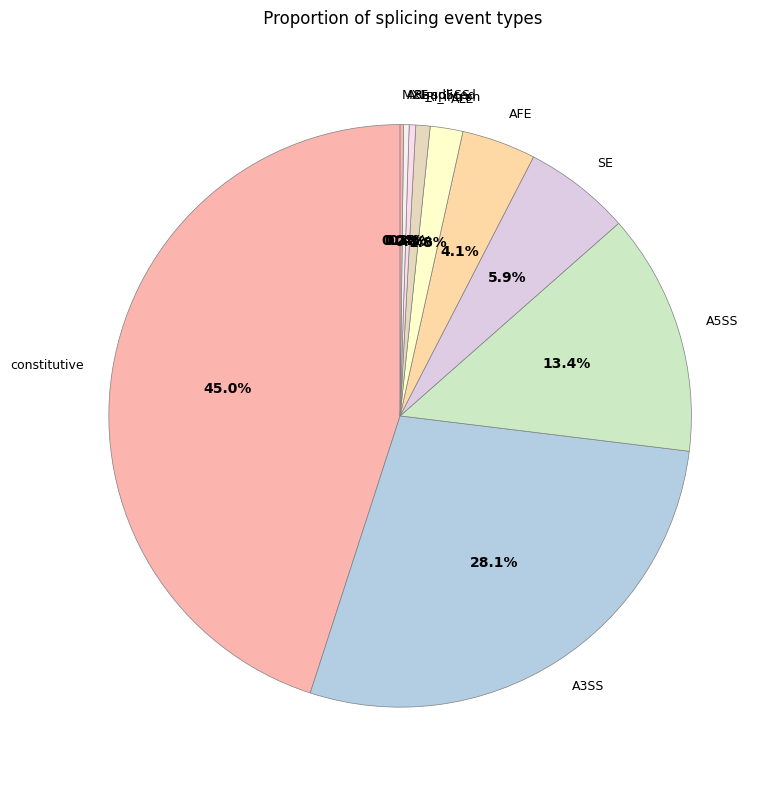

In [ ]:
import matplotlib.pyplot as plt


event_counts = df_events['event_type'].value_counts()
total = event_counts.sum()
percentages = (event_counts / total) * 100

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    event_counts,
    labels=event_counts.index,
    autopct='%.1f%%',  # Mostra porcentagens com 1 decimal
    startangle=90,      
    colors=plt.cm.Pastel1.colors,  
    wedgeprops={'edgecolor': 'gray', 'linewidth': 0.5}  
)

plt.setp(autotexts, size=10, weight='bold') 
plt.setp(texts, size=9)  
plt.title('MAJIQ Proportion of splicing event types', pad=20) 
plt.tight_layout()
plt.show()

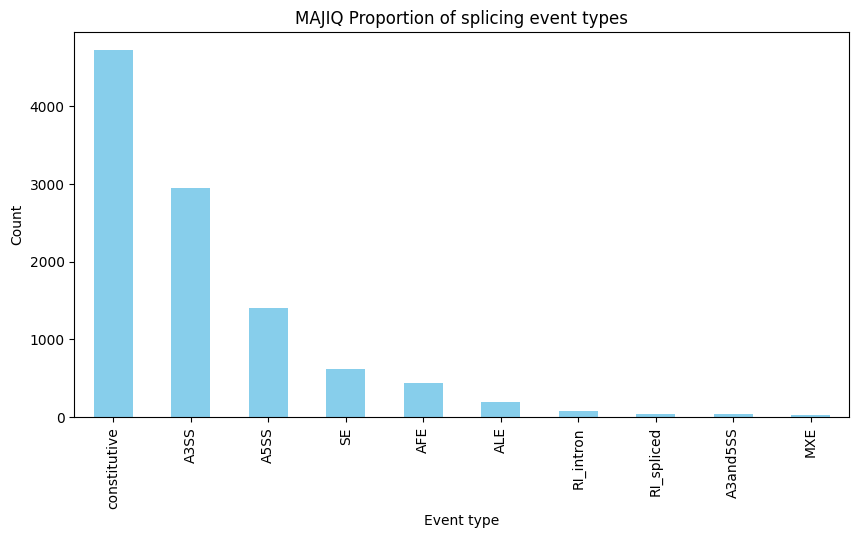

In [20]:
plt.figure(figsize=(10, 5))
event_counts.plot(kind='bar', color='skyblue')
plt.title('MAJIQ Proportion of splicing event types')
plt.xlabel('Event type')
plt.ylabel('Count')
plt.show()

### 2. Average events per gene

In [21]:
events_per_gene = df_events.groupby(['gene_id', 'event_type']).size().reset_index(name='count')
events_per_gene.head()

,gene_id,event_type,count
0,AT1G01020.Araport11.447,A5SS,2
1,AT1G01020.Araport11.447,constitutive,2
2,AT1G01040.Araport11.447,A5SS,2
3,AT1G01050.Araport11.447,constitutive,1
4,AT1G01060.Araport11.447,A3SS,2


/tmp/ipykernel_237645/3952041799.py:25: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


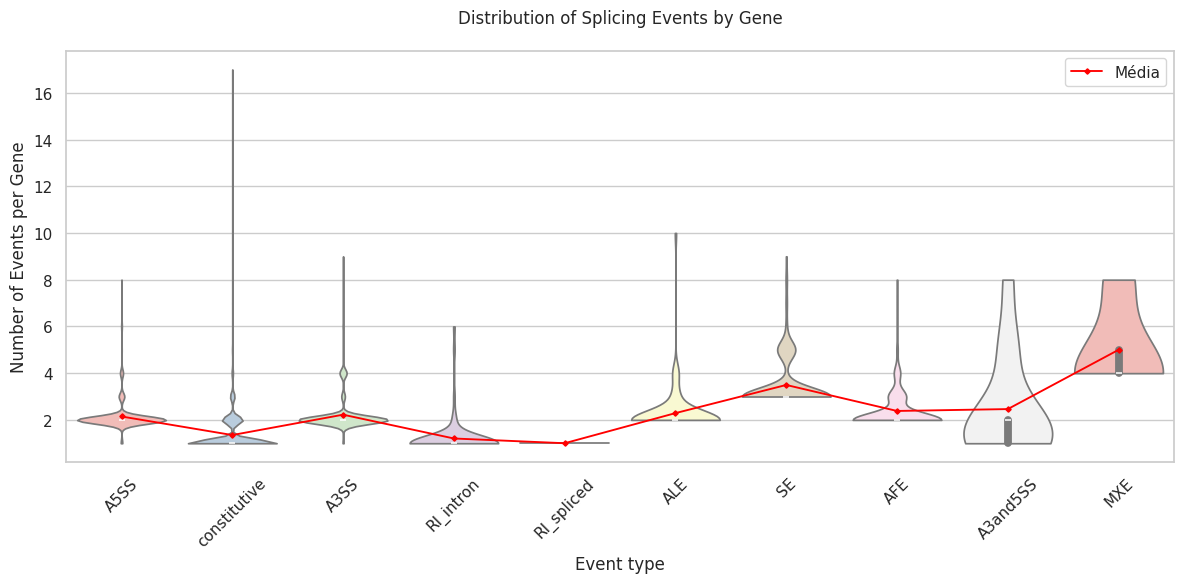

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Violin plot
ax = sns.violinplot(
    data=events_per_gene,
    x='event_type',
    y='count',
    hue='event_type', 
    palette="Pastel1",
    cut=0,
    legend=False      
)

plt.title('Distribution of Splicing Events by Gene', pad=20)
plt.xlabel('Event type')
plt.ylabel('Number of Events per Gene')
plt.xticks(rotation=45)  


mean_counts = events_per_gene.groupby('event_type')['count'].mean().reset_index()
sns.pointplot(
    data=mean_counts,
    x='event_type',
    y='count',
    color='red',
    markers='D',
    scale=0.5,
    ax=ax,
    label='Média'
)

plt.legend()
plt.tight_layout()
plt.show()

### 3. Dispersal of events on chromosomes

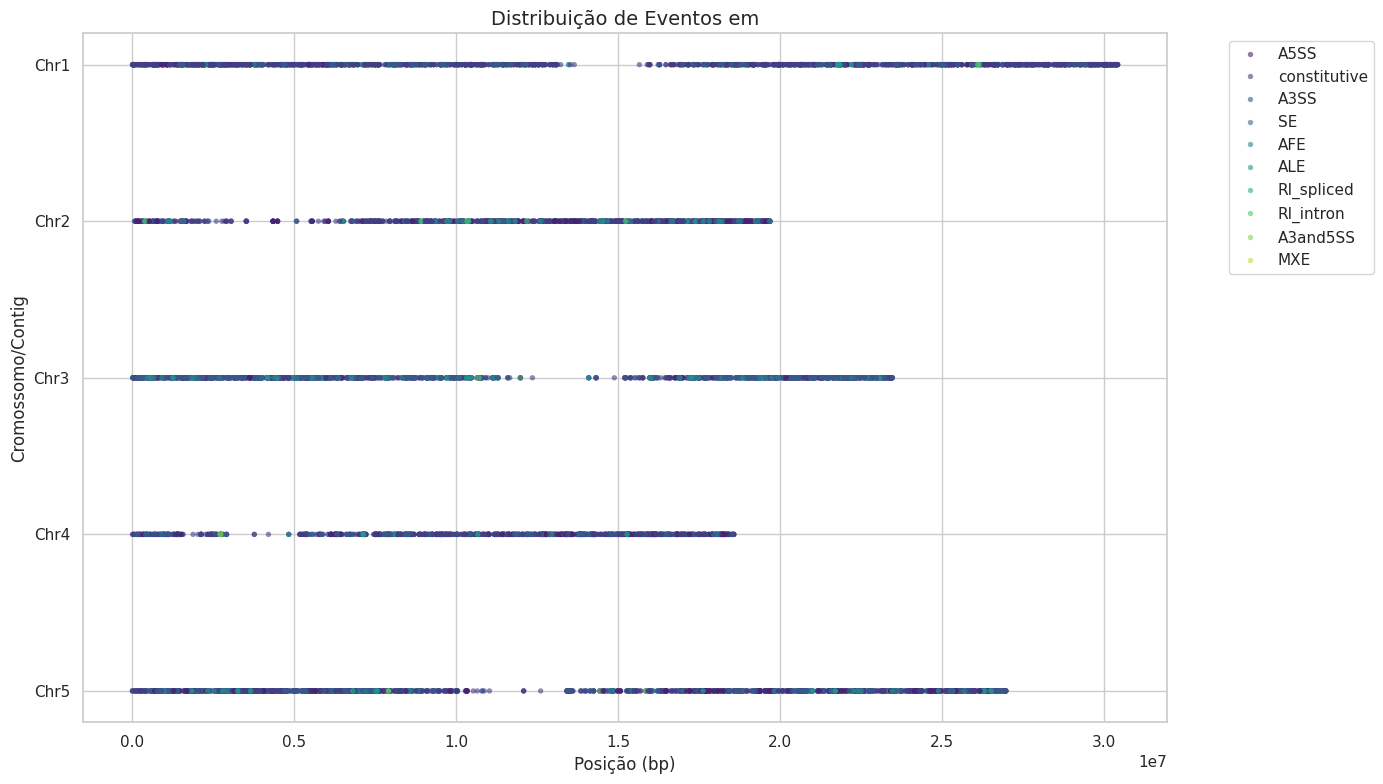

In [ ]:
plt.figure(figsize=(14, 8))

try:
    df_events['seqid_num'] = df_events['seqid'].str.extract('(\d+)').astype(float)
    df_events = df_events.sort_values('seqid_num')
except:
    df_events = df_events.sort_values('seqid')

# Plot
sns.scatterplot(
    data=df_events,
    x='start',
    y='seqid',
    hue='event_type',
    palette='viridis',
    alpha=0.6,
    s=15,
    linewidth=0
)

plt.title(f'Dispersal of events on chromosomes', fontsize=14)  
plt.xlabel('Pos (bp)')
plt.ylabel('Chr')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()

Text(0.5, 54.249999999999986, 'Cromossomo')

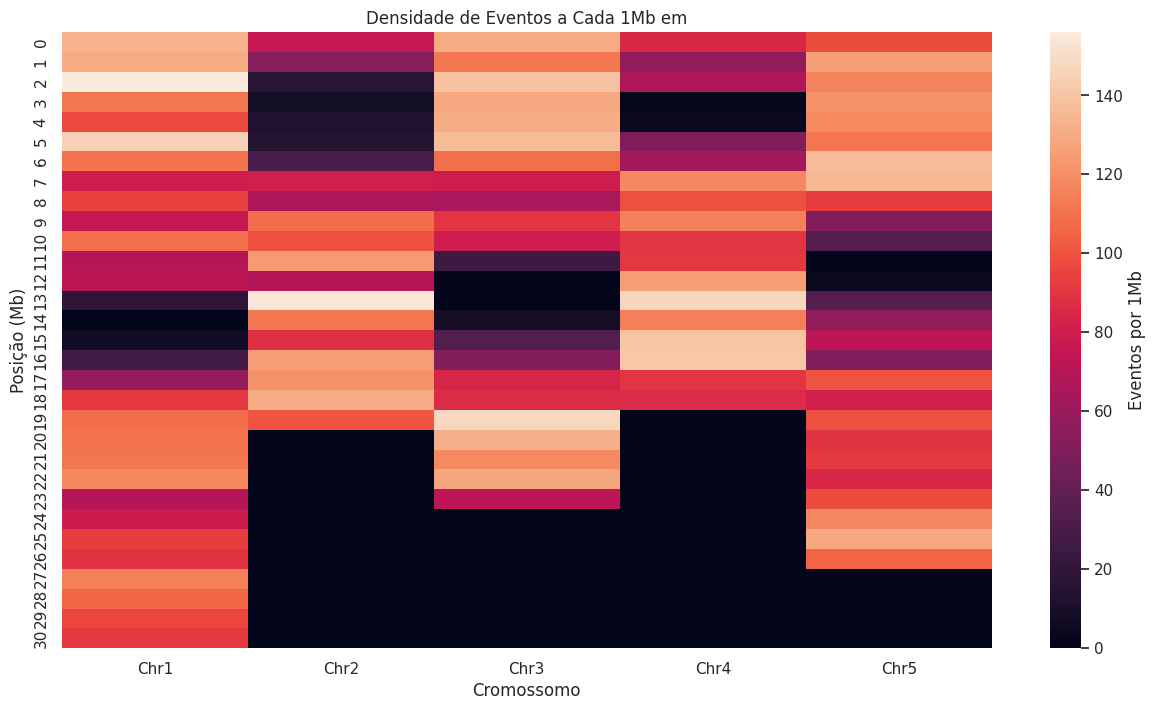

In [ ]:
df_events['pos_bin'] = (df_events['start'] // 1_000_000).astype(int) 

heatmap_data = df_events.groupby(['seqid', 'pos_bin']).size().unstack().fillna(0)

plt.figure(figsize=(15, 8))
sns.heatmap(
    heatmap_data.T,  
    cmap='rocket',
    cbar_kws={'label': 'Eventos por 1Mb'}
)
plt.title(f'Dispersal of events on chromosomes for 1Mb')
plt.ylabel('Pos (Mb)')
plt.xlabel('Chr')

### 4. De novo vs Annotated 

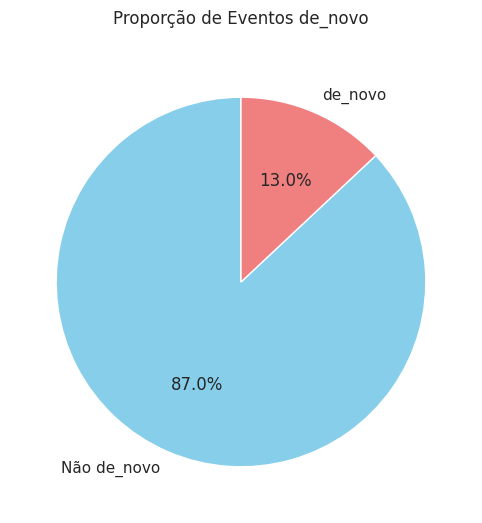

In [35]:
df_merged = pd.merge(
    df_samples[['event_id', 'de_novo']],
    df_events[['event_id', 'event_type']],
    on='event_id',
    how='left'
)

de_novo_stats = df_merged['de_novo'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 6))
de_novo_stats.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'lightcoral'],
    labels=['Não de_novo', 'de_novo'],
    startangle=90
)
plt.title('Proporção de Eventos de_novo', pad=20)
plt.ylabel('')
plt.show()

<Figure size 1200x600 with 0 Axes>

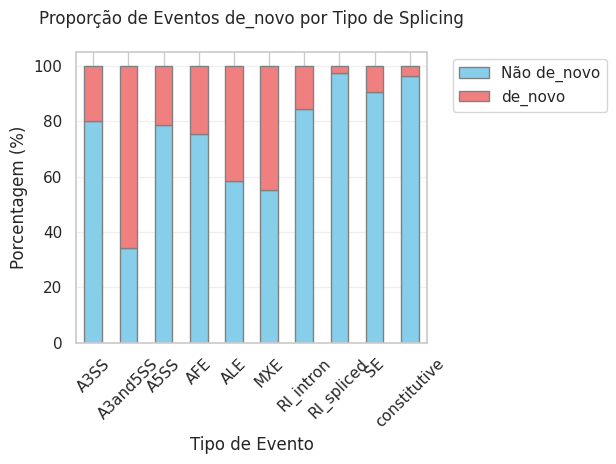

In [36]:
de_novo_by_type = df_merged.groupby(['event_type', 'de_novo']).size().unstack().fillna(0)

de_novo_by_type_percent = de_novo_by_type.div(de_novo_by_type.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(12, 6))
de_novo_by_type_percent.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'lightcoral'],
    edgecolor='gray'
)
plt.title('Proporção de Eventos de_novo por Tipo de Splicing', pad=20)
plt.xlabel('Tipo de Evento')
plt.ylabel('Porcentagem (%)')
plt.legend(['Não de_novo', 'de_novo'], bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()